# 3.06 Meteorological Harmony Change 

* With the introduction of __harm_change__ the harmony pattern can be changed by the meteorological data. The two pattern are still defined by hand, but when the pattern are switched, is controlled by the weather measurements. The pattern are only changed once.
* Weather Period from 1.8.2019 to 28.8.2019



In [1]:
from pyknon.genmidi import Midi
from pyknon.music import Rest, Note, NoteSeq
from music_generation import*
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
from datetime import date

### Read Meteorological Data

In [2]:
def read_meteo_data(fName):
    colNames = ['Stao','time', 'T_Boden_20cm', 'Flash_30km', 'Glob_rad', 'QFE','T_2m','Rain_Sum','H_rel','visibi','V_wind','direction_wind']  
    df = pd.read_csv(fName,sep=';', skiprows=3, names=colNames, na_values='-')
    print(df.head())
    return df

fPath = '/mnt/daten/04_Schule/42_Kanti/Matrua/Music_generation/Organisation/MeteoSchweiz/Daten/'
fName = 'order_75330_data.txt'
dM = read_meteo_data(fPath+fName)

NT, MP = dM.shape

  Stao          time  T_Boden_20cm  Flash_30km  Glob_rad    QFE  T_2m  \
0  KLO  201908010000          21.5           0         2  969.5  15.3   
1  KLO  201908010010          21.5           0         2  969.5  14.9   
2  KLO  201908010020          21.5           0         2  969.5  14.6   
3  KLO  201908010030          21.5           0         2  969.5  14.6   
4  KLO  201908010040          21.4           0         2  969.6  13.7   

   Rain_Sum  H_rel   visibi  V_wind  direction_wind  
0       0.0   80.4  20000.0     0.9             117  
1       0.0   82.4  20000.0     1.1              98  
2       0.0   83.7  20000.0     1.0             121  
3       0.0   82.7  20000.0     1.2             119  
4       0.0   88.8  20000.0     1.0             173  


### Chords and scales

In [3]:
C     = np.array([ 0, 4, 7])
Cm    = np.array([ 0, 3, 7])
Cdim  = np.array([ 0, 3, 6])

CM7   = np.array([ 0, 4, 7, 11])
C7    = np.array([ 0, 4, 7, 10])
Cm7   = np.array([ 0, 3, 7, 10])
Cdim7 = np.array([ 0, 3, 6, 10])
Cdim6 = np.array([ 0, 3, 6, 9 ])
C6    = np.array([ 0, 4, 7, 9 ]) # inversion of Am7
Cm6   = np.array([ 0, 3, 7, 9 ])

Csus4 = np.array([ 0, 5, 7])
Csus2 = np.array([ 0, 2, 7])
Csus47= np.array([ 0, 5, 7, 10])

P = np.array([ 0,7])  # Power chord (Perfect unison, Perfect fifth)
B = np.array([ 0])    # Bass (Perfect unison)

major = np.array([ 0, 2, 4, 5, 7, 9, 11])
minor = np.array([ 0, 2, 3, 5, 7, 8, 10])
blues = np.array([ 0, 3, 5, 6, 7, 10])

### Harmony Change

The __Harm_Change__ function replaces the __pattern_gen__ function.
Harm_Change calls the pattern_gen function for creating the pattern.
It assembles two pattern dependent on meteorological data input.
When the data reaches a manually defined value the first time, the pattern is changed.
The Pattern changes only once.
The end scale functionalities are still in use.
When a harmony change by meteorological data is not desired, the pattern_gen function is also available for further use.


In [4]:
def harm_change(meteo,value,scale1,scale2,end_scale,melody_len,mpb):
    met_resolution = 10
    end_zero = [[0,'C',B]]                     #  Fake end for pattern1
    i_when = (np.argwhere(meteo>=value))[0,0]  # Find where value is reached first time
    b_when = i_when*met_resolution/mpb         # calculate in to beat_nr    
    if b_when >= melody_len:                   # when Change is out of song length
        print('No pattern Change')
        pattern_add = pattern_gen(scale1, end_scale, melody_len)
        
    else:
        pattern1 = pattern_gen(scale1, end_zero, b_when)               # pattern_gen 1
        pattern2 = pattern_gen(scale2, end_scale, melody_len - b_when) # pattern_gen 2 
        pattern2[:,0] = pattern2[:,0] + b_when                         # add b_when to the change times of second pattern
        pattern_add = np.concatenate((pattern1,pattern2),axis=0)       # merge both patterns
    return pattern_add

## tune 306_A

* period from 11.8 to 15.8.2019
* Temperature and pressure played by pianos.
* Timpani volume is regulated by the rain.
* A music box plays the melody of the global radiation. During night the melody is paused.
* The numbers of flashes changes the chord pattern. The first time when 15 flashes per ten minutes are reached the scale is switched from major to minor. It would be possible to change a harmony pattern and not only two scales.




In [8]:
def tune_306_A():
    tune_name = 'tune_306_A'  
    np.random.seed(54)  #50
    bar, bpb      = 23, 4     # bar: Takt , bpb: beat per bar
    s_day, s_hour = 2, 12   # Start point in the data
    mpb     =  80            # minutes per beat
    end_dur =  1
    melody_len, start = print_dur(bar,bpb,mpb,s_day,s_hour,tune_name)

    trans = met_transform(dM,[1,1,0.025,3,1.3,400,0.2,1,4.5,1,],[6,6,6,6,6,12,6,6,6,2],start)
    
    scale1 = [[8,'C',major]]
    scale2 = [[8,'C',minor]]
    end_scale = [[0.5,'C',Cm]]
    # Flash for changing Chord pattern
    pattern = harm_change(trans[1],15,scale1,scale2,end_scale,  melody_len,mpb)

    # Pressure
    rythem1, notenr_1 = ran_duration([1/32,1/8, 1/4,1/2], [0,2,3,1], melody_len, end_dur)
    melody1 = meteo_melody(trans[3],pattern, 72, notenr_1, rythem1,mpb)
    volumes1 = ran_volume([0,115], [1,8], notenr_1 )
    notes1 = NoteSeq( [Note(no,octave=0, dur=du, volume=vo) for no,du,vo in zip(melody1,rythem1,volumes1)] )
    
    # temp
    rythem2, notenr_2 = ran_duration([1/16,1/8, 1/4,1/2], [0,2,3,2], melody_len, end_dur)
    melody2 = meteo_melody(trans[4],pattern, 60, notenr_2, rythem2,mpb)
    volumes2 = ran_volume([0,115], [1,8], notenr_2 )
    notes2 = NoteSeq( [Note(no,octave=0, dur=du, volume=vo) for no,du,vo in zip(melody2,rythem2,volumes2)] )
    
    #timpani rain
    melody3, rythem3, volumes3 = drum([1/16], [60,63],[100,127],melody_len) 
    volumes3 = met_vol(trans[5],0,127,rythem3, mpb)
    notes3 = NoteSeq( [Note(no,octave=0, dur=du, volume=vo) for no,du,vo in zip(melody3,rythem3,volumes3)] )
    
    # glob radation
    rythem4, notenr_4 = ran_duration([1/32,1/16,1/8, 1/4,], [0,3,1,0], melody_len, end_dur)
    melody4 = meteo_melody(trans[2],pattern, 85, notenr_4, rythem4, mpb)
    volumes4 = ran_volume([0,110], [0,8], notenr_4 )
    volumes4 = on_off(trans[2],[5,20000],volumes4, rythem4, mpb)
    notes4 = NoteSeq( [Note(no,octave=0, dur=du, volume=vo) for no,du,vo in zip(melody4,rythem4,volumes4)] )
    
    instruments = [68,71,47,10]
    notes = [notes1,notes2,notes3,notes4]
    return notes, instruments,tune_name

__Instruments:__
Available are at lest the 128 General-Midi (GM) Instruments. Depending on the sound-fonts there is a bigger choice. A list of the GM instruments can be found here. https://jazz-soft.net/demo/GeneralMidi.html


## Generate Midi and Audio file

In [9]:
def gen_midi():
#     squezze into a MIDI framework
    notes, instruments, tune_name = tune_306_A() #  <--- select a tune  <<--     <<<<<<<<<--- select a tune -----
    nTracks = len(notes)
    
    m = Midi(number_tracks=nTracks, tempo=120, instrument=instruments)
    for iTrack in range(nTracks):
        m.seq_notes(notes[iTrack], track=iTrack)

    #--- write the MIDI file -----
    midi_file_name = tune_name +'.mid'   # set the name of the file
    m.write(midi_file_name)
    return midi_file_name

tune_306_A: Start: 2 day 12 h   End: 7.0 day 14.666666666666686 h


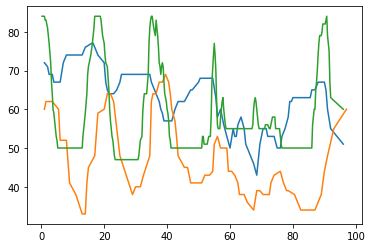

In [10]:
######---  Main  ---######
midi_file_name = gen_midi()

midi_play(midi_file_name)
midi_audio(midi_file_name)
midi_png(midi_file_name)


### External __Music_Generation__ library
This library changes from version to version. New or changed code is first explained above. This is a copy of music_generation.py 